In [2]:
import pandas as pd
import numpy as np



In [3]:
data= pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Population_Data.csv')

In [4]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [15]:
data['Region'].value_counts(), data['Office Location Id'].value_counts()

(Region
 Region 31    1
 Region 2     1
 Region 30    1
 Region 9     1
 Region 29    1
 Region 19    1
 Region 10    1
 Region 27    1
 Region 8     1
 Region 38    1
 Region 17    1
 Region 36    1
 Region 32    1
 Region 6     1
 Region 28    1
 Region 7     1
 Region 35    1
 Region 14    1
 Region 21    1
 Region 13    1
 Region 15    1
 Region 26    1
 Region 12    1
 Region 22    1
 Region 23    1
 Region 20    1
 Region 1     1
 Region 24    1
 Region 11    1
 Region 4     1
 Region 37    1
 Region 34    1
 Region 18    1
 Region 16    1
 Region 25    1
 Region 33    1
 Region 5     1
 Region 3     1
 Name: count, dtype: int64,
 Office Location Id
 1     1
 7     1
 26    1
 20    1
 5     1
 25    1
 21    1
 35    1
 24    1
 32    1
 9     1
 34    1
 31    1
 28    1
 30    1
 36    1
 37    1
 33    1
 23    1
 29    1
 19    1
 27    1
 4     1
 15    1
 13    1
 6     1
 11    1
 10    1
 3     1
 8     1
 14    1
 12    1
 22    1
 17    1
 18    1
 16    1
 2     1
 38

In [16]:
#dropping region and office location id as they are unique for each value and do not contribute in clustering.
data.drop(['Region', 'Office Location Id'], axis=1, inplace=True)

In [19]:
numeric_columns = data.select_dtypes(include=['object']).columns

In [18]:
numeric_columns

Index(['Indians', 'Foreigners', 'Indian_Male', 'Indian_Female',
       'Foreigners_Male', 'Foreigners_Female', 'Total Population'],
      dtype='object')

In [20]:
for column in numeric_columns:
    data[column]=data[column].str.replace(',','').astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Indians            38 non-null     int64
 1   Foreigners         38 non-null     int64
 2   Indian_Male        38 non-null     int64
 3   Indian_Female      38 non-null     int64
 4   Foreigners_Male    38 non-null     int64
 5   Foreigners_Female  38 non-null     int64
 6   Total Population   38 non-null     int64
dtypes: int64(7)
memory usage: 2.2 KB


In [22]:
data.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,643596,2883782,440445,203151,2763718,72515,3527378
1,319933,1501899,213477,106456,1449303,27671,1821832
2,194379,650744,161803,32576,631660,10652,845123
3,107360,470708,85343,22017,450267,6389,578068
4,55351,329980,31796,23555,325105,3684,385331


In [28]:
#Checking for data integrity
for i in range(len(data['Indians'])):

  if (data['Indians'][i] + data['Foreigners'][i]) == data['Total Population'][i]:
    print(f"Condition is True in row {i}")
  else:
    print(f"Condition is False in row {i}")


Condition is True in row 0
Condition is True in row 1
Condition is True in row 2
Condition is True in row 3
Condition is True in row 4
Condition is True in row 5
Condition is True in row 6
Condition is True in row 7
Condition is True in row 8
Condition is True in row 9
Condition is True in row 10
Condition is True in row 11
Condition is True in row 12
Condition is True in row 13
Condition is True in row 14
Condition is True in row 15
Condition is True in row 16
Condition is True in row 17
Condition is True in row 18
Condition is True in row 19
Condition is True in row 20
Condition is True in row 21
Condition is True in row 22
Condition is True in row 23
Condition is True in row 24
Condition is True in row 25
Condition is True in row 26
Condition is True in row 27
Condition is True in row 28
Condition is True in row 29
Condition is True in row 30
Condition is True in row 31
Condition is True in row 32
Condition is True in row 33
Condition is True in row 34
Condition is True in row 35
Co

In [27]:
for i in range(len(data['Indians'])):

  calc = data['Total Population'][i]-(data['Indian_Male'][i] + data['Indian_Female'][i] + data['Foreigners_Male'][i] + data['Foreigners_Female'][i])
  if calc == 0:
    print(f"Condition is True in row {i} ")
  else:
    print(f"Condition is False in row {i} and the difference is {calc}")

Condition is False in row 0 and the difference is 47549
Condition is False in row 1 and the difference is 24925
Condition is False in row 2 and the difference is 8432
Condition is False in row 3 and the difference is 14052
Condition is False in row 4 and the difference is 1191
Condition is False in row 5 and the difference is 7318
Condition is False in row 6 and the difference is 2816
Condition is False in row 7 and the difference is 339
Condition is False in row 8 and the difference is 1808
Condition is False in row 9 and the difference is 378
Condition is False in row 10 and the difference is 542
Condition is False in row 11 and the difference is 405
Condition is False in row 12 and the difference is 217
Condition is False in row 13 and the difference is 139
Condition is False in row 14 and the difference is 22
Condition is False in row 15 and the difference is 412
Condition is False in row 16 and the difference is 405
Condition is False in row 17 and the difference is 566
Condition 

In [30]:
#The above code suggests presence of another gender others, thus creating new column

data['Others'] = data['Total Population'] - (data['Indian_Male'] + data['Indian_Female'] + data['Foreigners_Male'] + data['Foreigners_Female'])

In [37]:
data.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Others
0,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,194379,650744,161803,32576,631660,10652,845123,8432
3,107360,470708,85343,22017,450267,6389,578068,14052
4,55351,329980,31796,23555,325105,3684,385331,1191


In [42]:
data.drop(columns=['Total Population'], inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaled_data= pd.DataFrame(StandardScaler().fit_transform(data), columns= data.columns)

In [44]:
scaled_data.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Others
0,5.210141,5.236361,5.129794,5.300876,5.225687,5.616170,5.117551
1,2.386435,2.518660,2.271904,2.600394,2.531599,1.935556,2.520377
2,1.291074,0.844724,1.621246,0.537085,0.855719,0.538706,0.627026
3,0.531902,0.490654,0.658493,0.242195,0.483927,0.188816,1.272186
4,0.078164,0.213889,-0.015749,0.285148,0.227389,-0.033200,-0.204221


In [45]:
from sklearn.cluster import KMeans

In [46]:
clusters_new= KMeans(n_clusters=3, random_state=42)
clusters_new.fit(scaled_data)
scaled_data['Clusters']= clusters_new.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
clusters_new.inertia_

19.402821350964494

In [53]:
def inertia(data):
  wcss=[]
  for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

  return wcss


In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

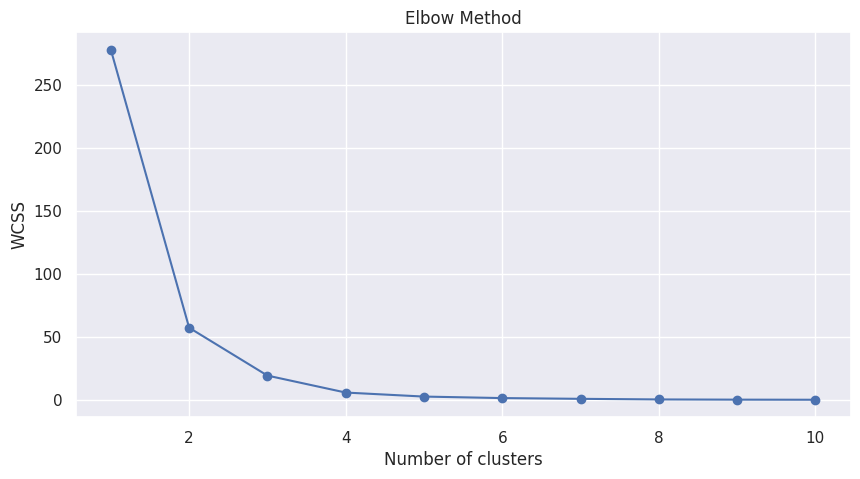

In [54]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
cluster_range= range(1,11)
wcss= inertia(scaled_data)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

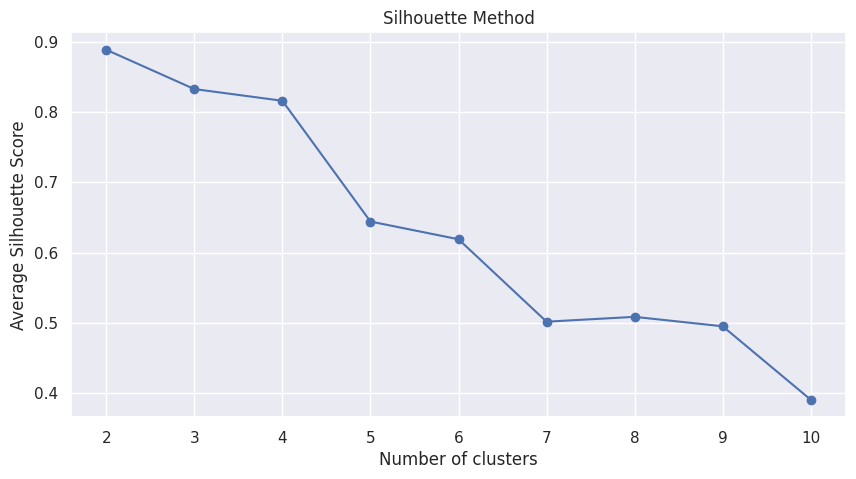

In [57]:
def silhouette_analysis(data, range_n_clusters):
    silhouette_avg_scores = []

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)

    return silhouette_avg_scores

# Define the range of clusters to evaluate
cluster_range = range(2, 11)

# Calculate the silhouette scores for the range of clusters
silhouette_avg_scores = silhouette_analysis(scaled_data, cluster_range)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
plt.plot(cluster_range, silhouette_avg_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()